<a href="https://colab.research.google.com/github/WilsonG08/TAREA2/blob/main/TAREA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importacion de librerias

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import load_iris

import seaborn as sns
import matplotlib.pyplot as plt

La exactitud del modelo es :  0.98
Caso 1 -> Medicamento tipo:  [0]
Caso 2 -> Medicamento tipo:  [4]
Caso 3 -> Medicamento tipo:  [2]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


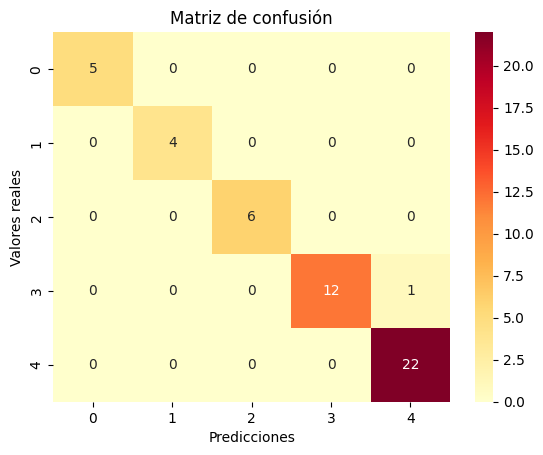

Importancia caracteristicas
0.13944480309877338:Unnamed: 0
0.0:Age
0.266593480392004:Sex
0.10946753866449604:BP
0.4844941778447267:Cholesterol


In [ ]:
# Leer el archivo 
datos = pd.read_excel("medicinas.xlsx")

# Separar las caracteristicas (X) y el objetivo (Y)
# Datos de entrada (Caracteristicas)
X = datos.iloc[:, 1:-1] # Todas las columnas excepto la ultima
# DAtos de salida
y = datos.iloc[:, -1] # Ultima columna


# Dividir los datos 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=25)


# Creacion del modelo de arbol de decision
modeloArbol = DecisionTreeClassifier()

# Entrenar el modelo con los datos de entrenamiento
modeloArbol.fit(X_train, y_train)


#Probar el modelo con los datos de prueba
y_obt = modeloArbol.predict(X_test)


# Calcular la exactitud del modelo
exactitudModelo = accuracy_score(y_test, y_obt)
print("La exactitud del modelo es : ", exactitudModelo)


# Matriz de confusion 
confusion = confusion_matrix(y_test, y_obt)


# Prediccion 1
# Hombre, 45 años, con presión arterial alta, colesterol normal y concentración de sodio y potasio de 12.
mediCaso1 = [[45, 0, 2, 0, 12]]
tipoMedicina1 = modeloArbol.predict(mediCaso1)
print("Caso 1 -> Medicamento tipo: ", tipoMedicina1)

# Prediccion 2
# Mujer, 30 años, con presión arterial normal, colesterol normal y concentración de sodio y potasio de 30.
mediCaso2 = [[30, 1, 1, 0, 30]]
tipoMedicina2 = modeloArbol.predict(mediCaso2)
print("Caso 2 -> Medicamento tipo: ", tipoMedicina2 ,)


# Prediccion 3
# Mujer, 65 años, con presión arterial bajo, colesterol alto y concentración de sodio y potasio de 7.
mediCaso3 = [[65, 1, 0, 1, 7]]
tipoMedicina3 = modeloArbol.predict(mediCaso3)
print("Caso 3 -> Medicamento tipo: ", tipoMedicina3)


# Mapa de calor para la matriz de confusio
sns.heatmap(confusion, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Matriz de confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.show()


# Obteber la importancia de las características
Impor_caract = modeloArbol.feature_importances_

# Obtener nombre caracteristica
nombreCaract = datos.columns.tolist()

# Imprimir la importancia caracteristicas
print("Importancia caracteristicas")
for nombre_carc, impt in zip (Impor_caract, nombreCaract):
  print(f"{nombre_carc}:{impt}")

